In [1]:
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath('..'))

In [2]:
df=pd.read_csv('../Data/data.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def perform_eda(df):
    """
    Perform Exploratory Data Analysis (EDA) on the given DataFrame.

    Parameters:
    df (pd.DataFrame): Input DataFrame

    Returns:
    None: Displays plots and prints summaries.
    """
    # Overview of the data
    print("\n--- Dataset Overview ---")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print("\n--- Data Types ---")
    print(df.dtypes)

    # Summary statistics
    print("\n--- Summary Statistics ---")
    print(df.describe(include='all'))

    # Missing values
    print("\n--- Missing Values ---")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])

    # Distribution of numerical features
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    print("\n--- Distribution of Numerical Features ---")
    for feature in numerical_features:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[feature], kde=True, bins=30)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

    # Distribution of categorical features
    categorical_features = df.select_dtypes(include=['object', 'category']).columns
    print("\n--- Distribution of Categorical Features ---")
    for feature in categorical_features:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

    # Correlation analysis
    print("\n--- Correlation Analysis ---")
    if len(numerical_features) > 1:
        corr_matrix = df[numerical_features].corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
        plt.title('Correlation Matrix of Numerical Features')
        plt.xlabel('Features')
        plt.ylabel('Features')
        plt.show()
    else:
        print("Not enough numerical features for correlation analysis.")

    # Outlier detection using box plots
    print("\n--- Outlier Detection ---")
    for feature in numerical_features:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df, x=feature)
        plt.title(f'Boxplot of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Value')
        plt.show()

    print("EDA completed successfully!")

perform_eda(df)


--- Dataset Overview ---
Number of rows: 95662
Number of columns: 16

--- Data Types ---
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

--- Summary Statistics ---
              TransactionId        BatchId       AccountId  \
count                 95662          95662           95662   
unique                95662          94809            3633   
top     TransactionId_35670  BatchId_67019  AccountId_4841   
freq                      1             28           30893   
mean                    NaN            NaN    

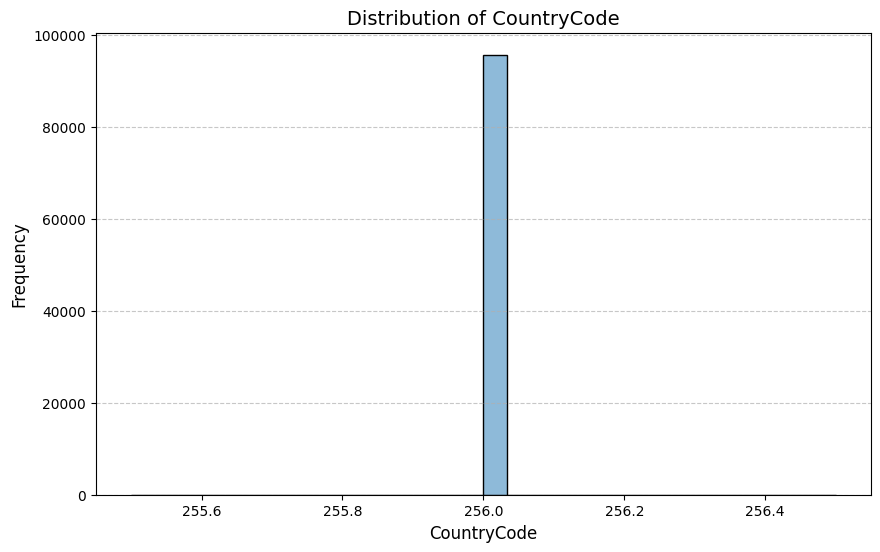

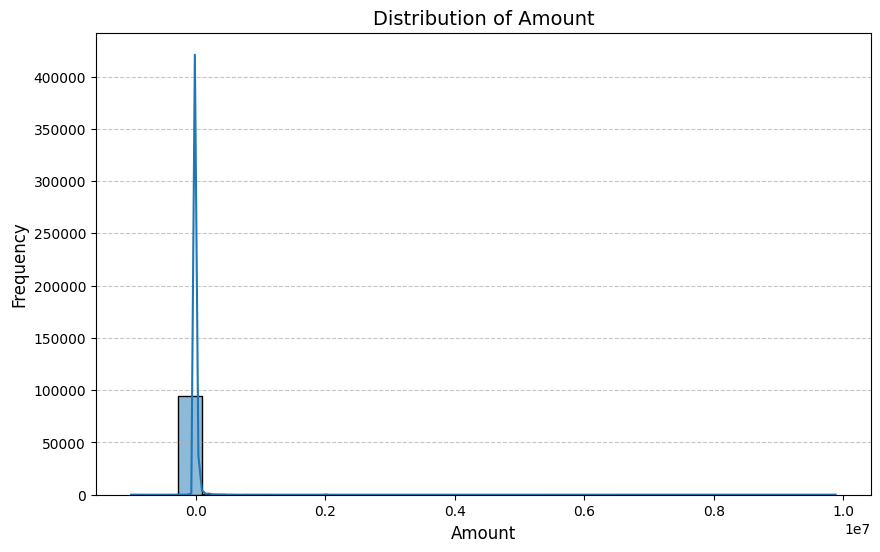

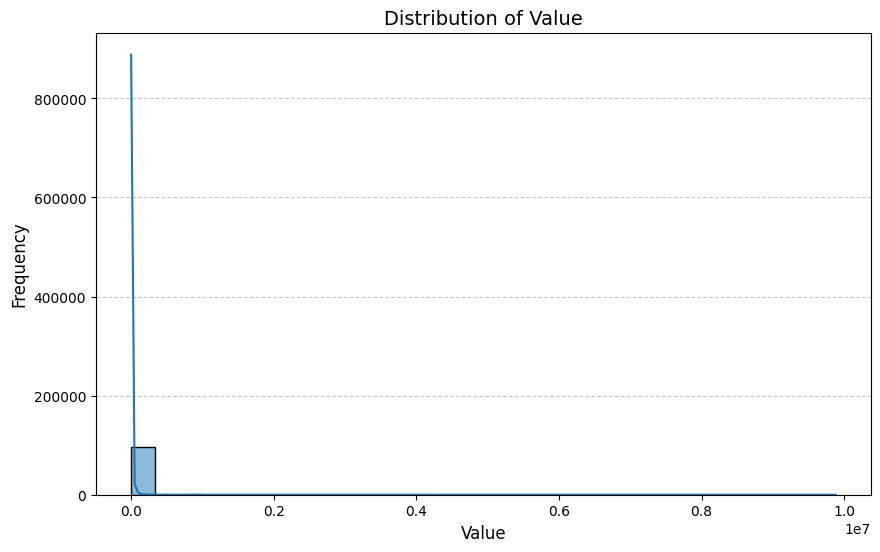

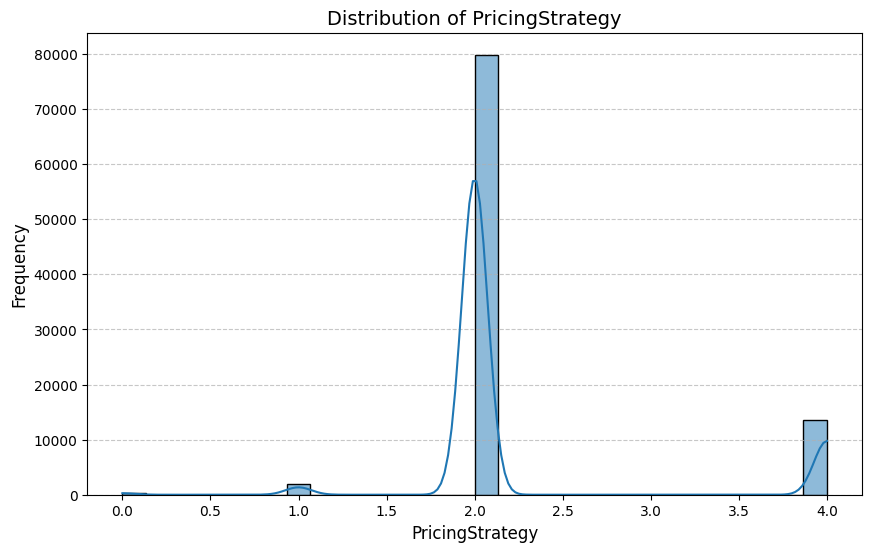

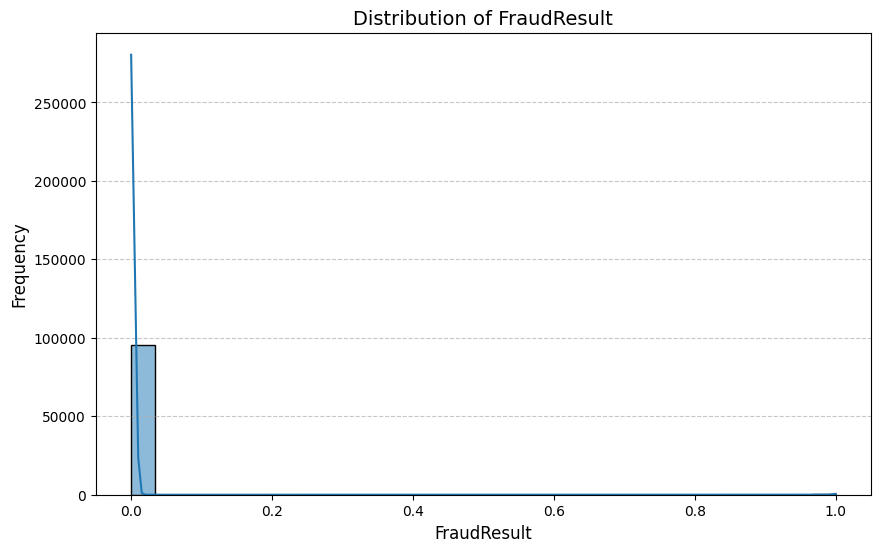


--- Distribution of Categorical Features ---


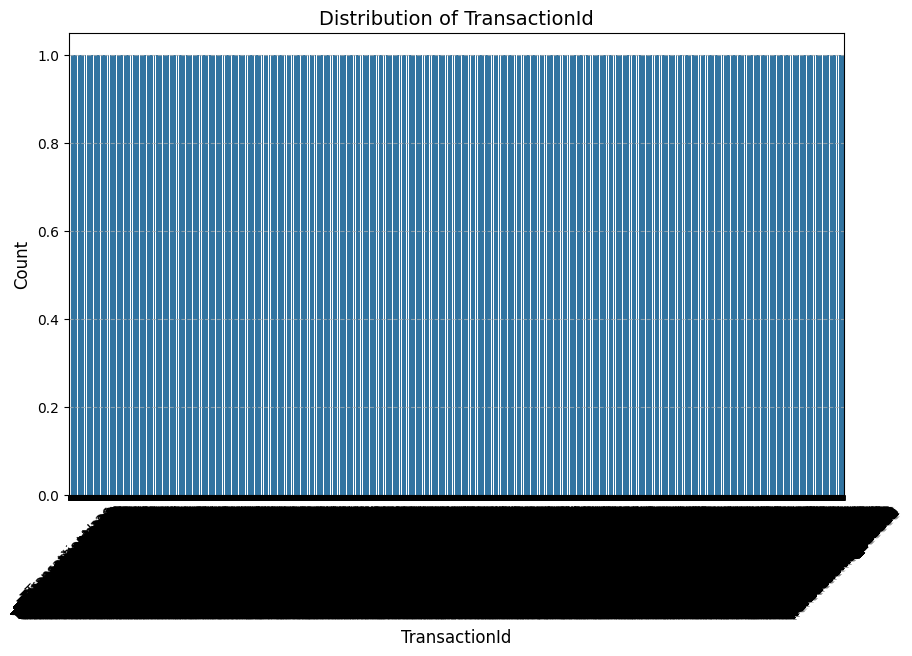

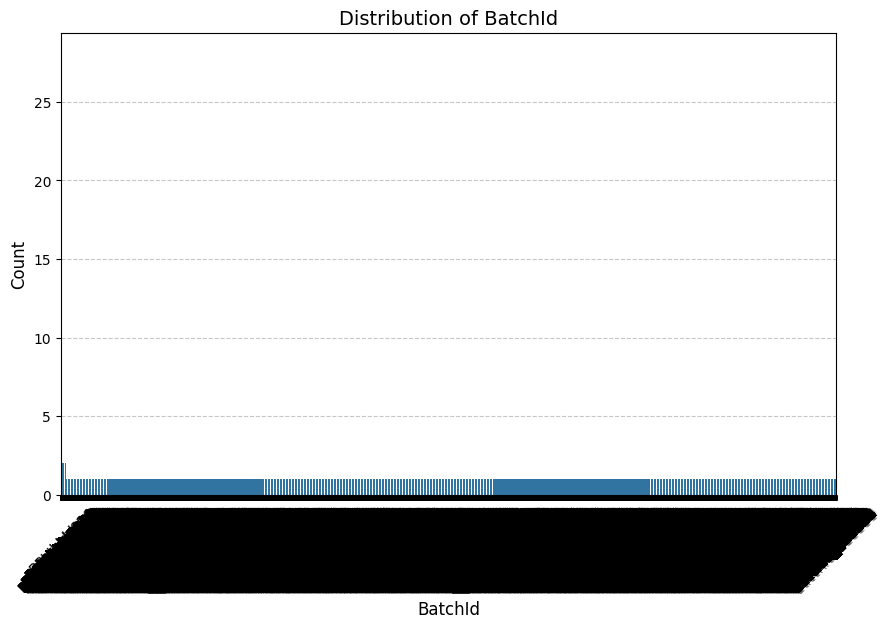

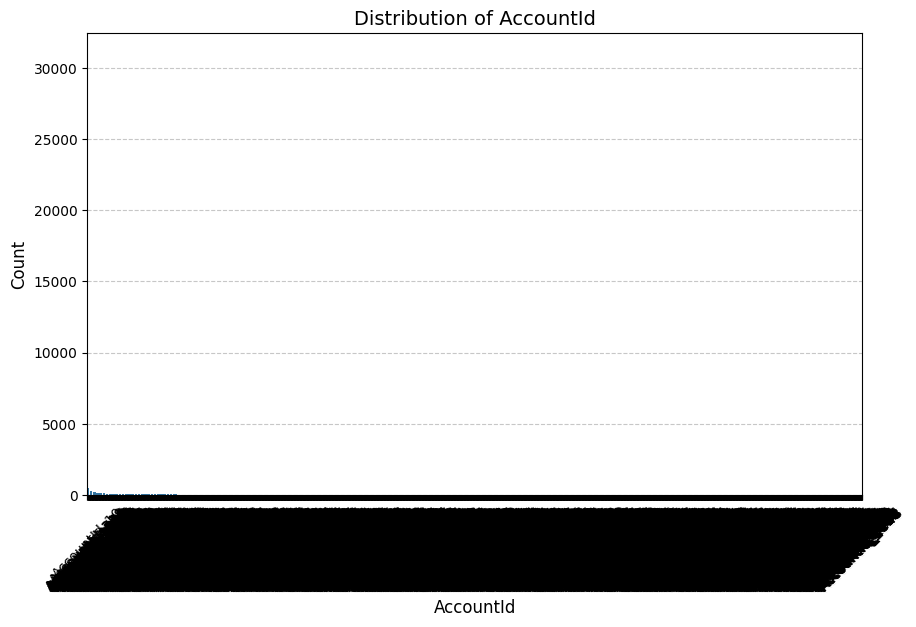

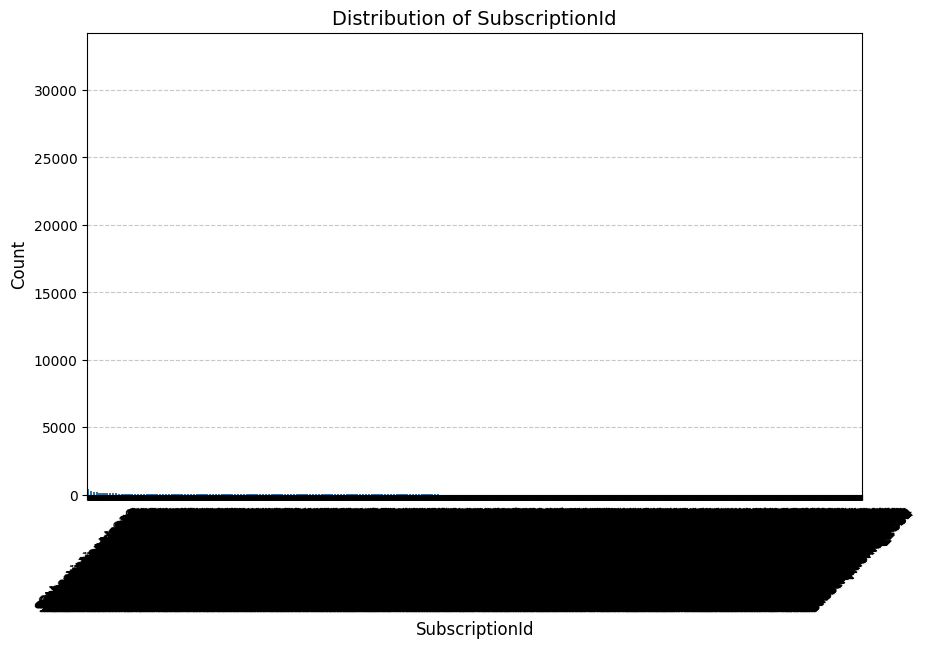

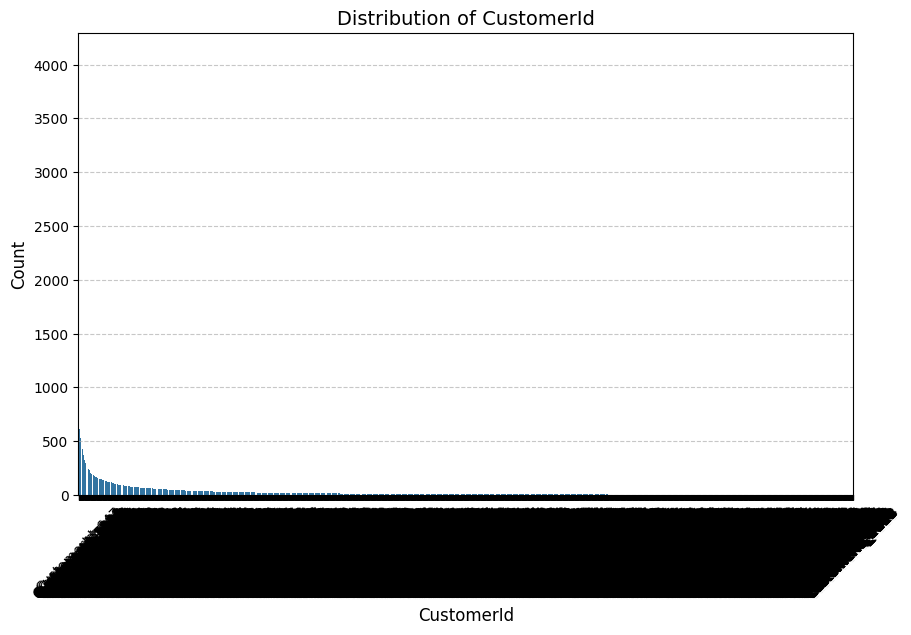

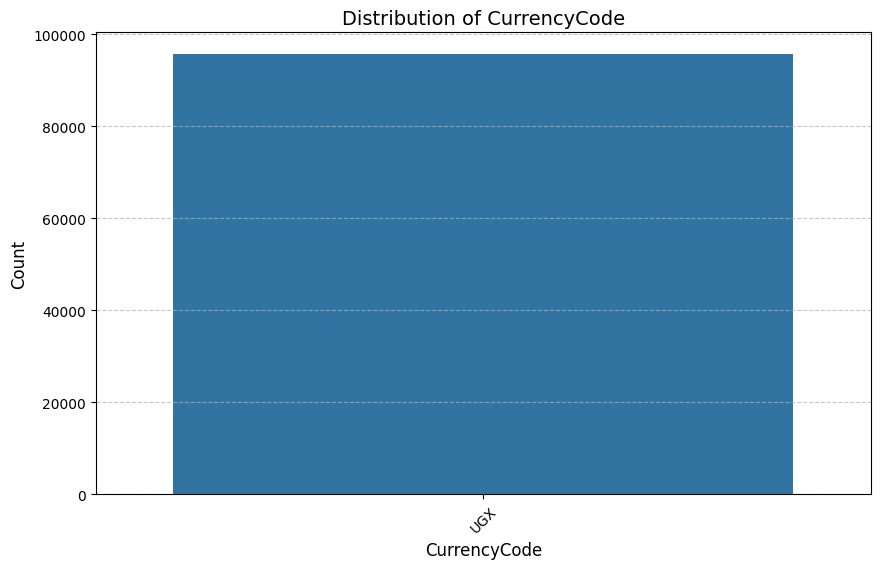

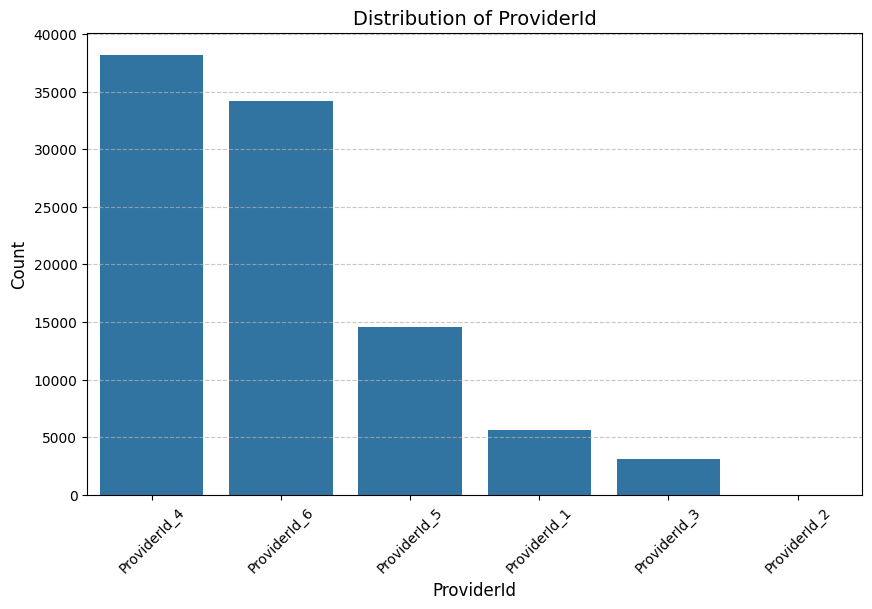

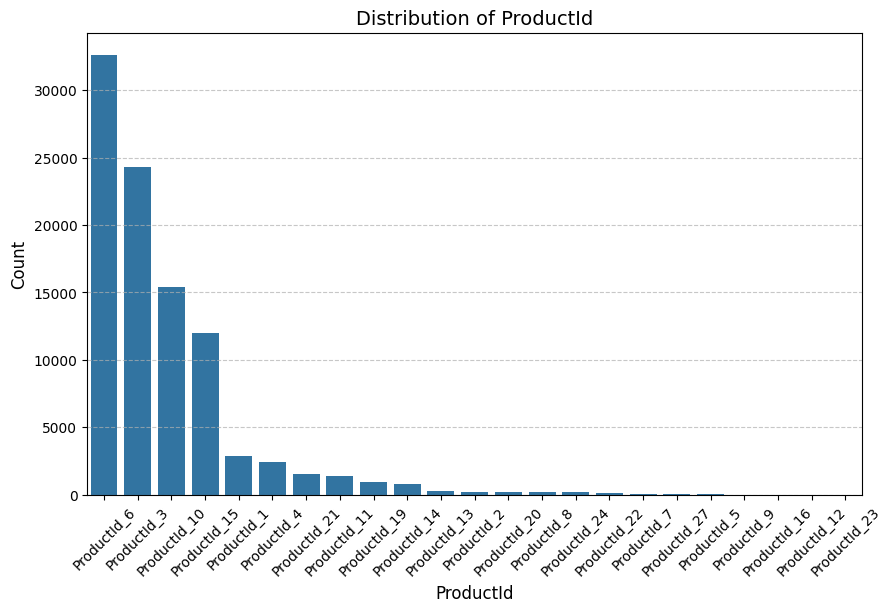

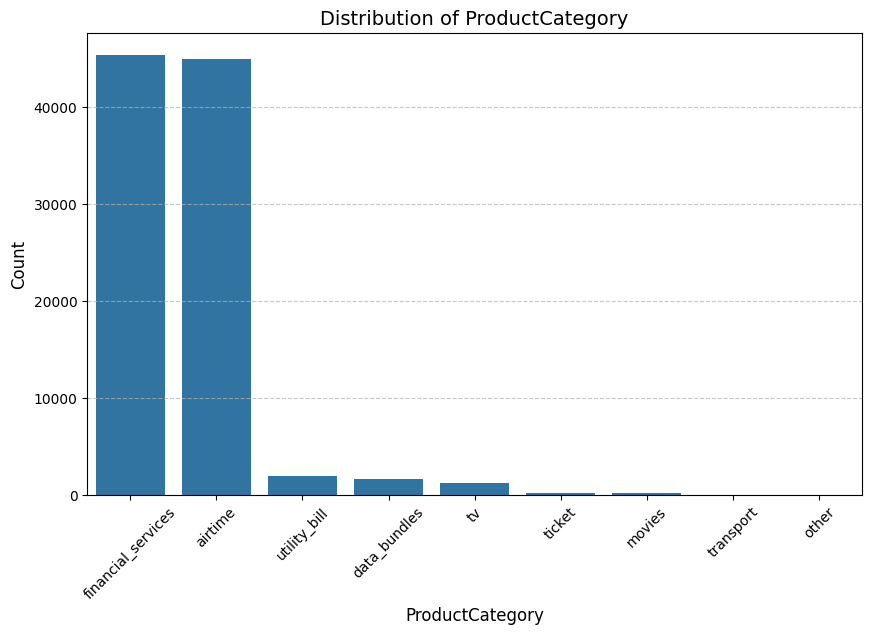

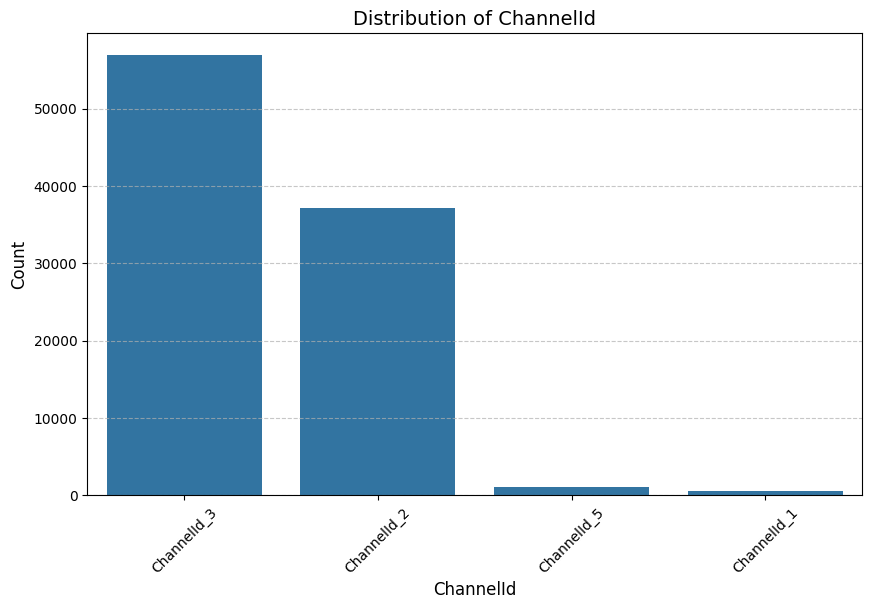

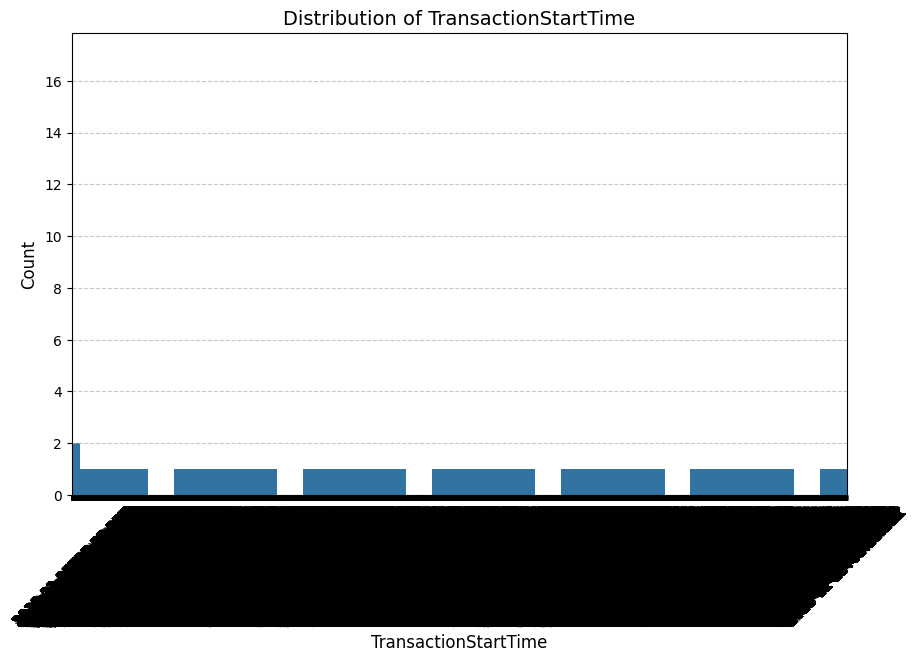


--- Correlation Analysis ---


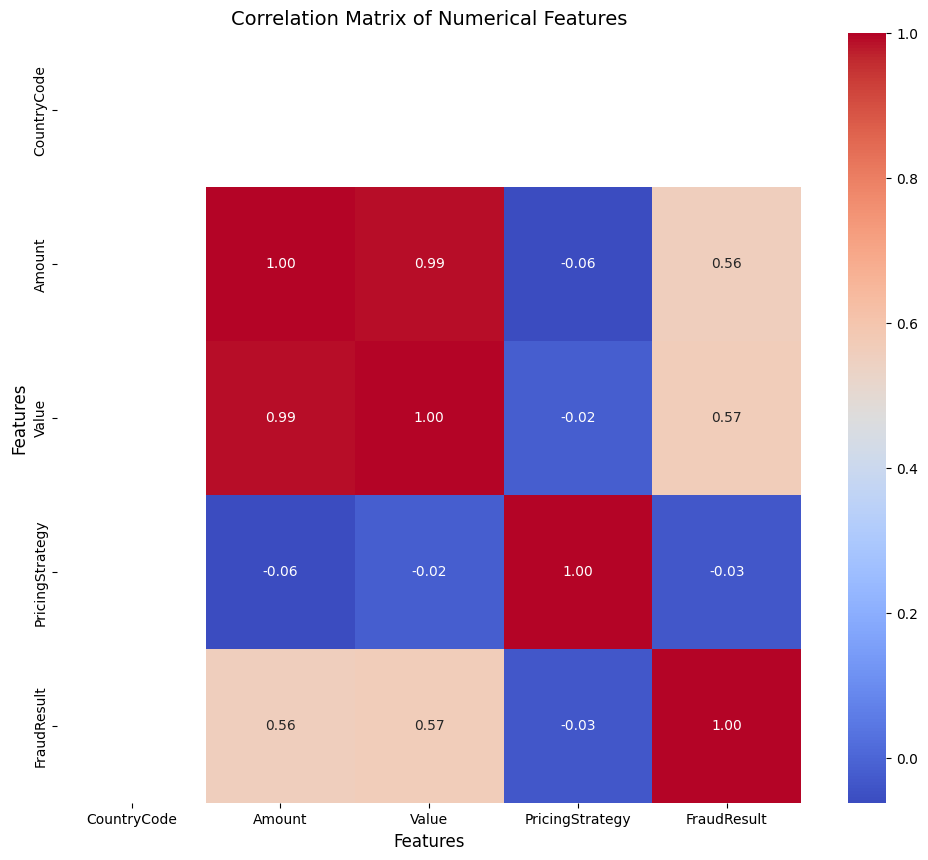


--- Outlier Detection ---


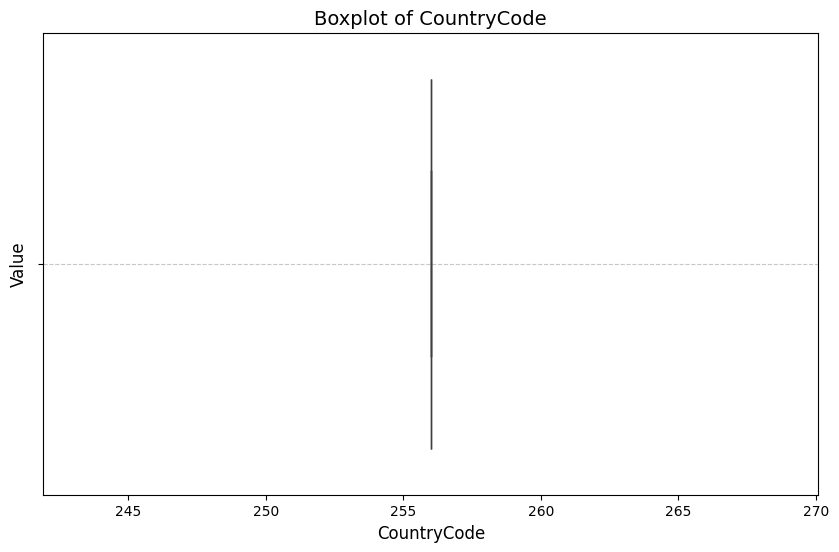

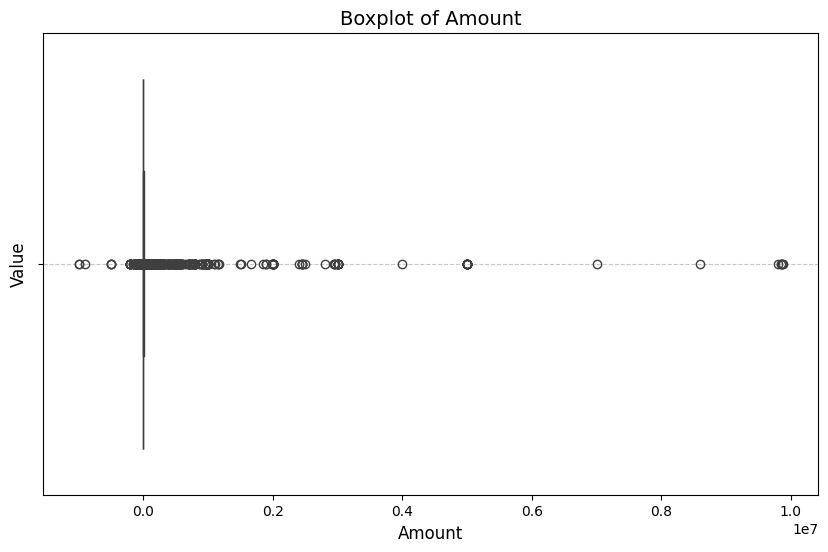

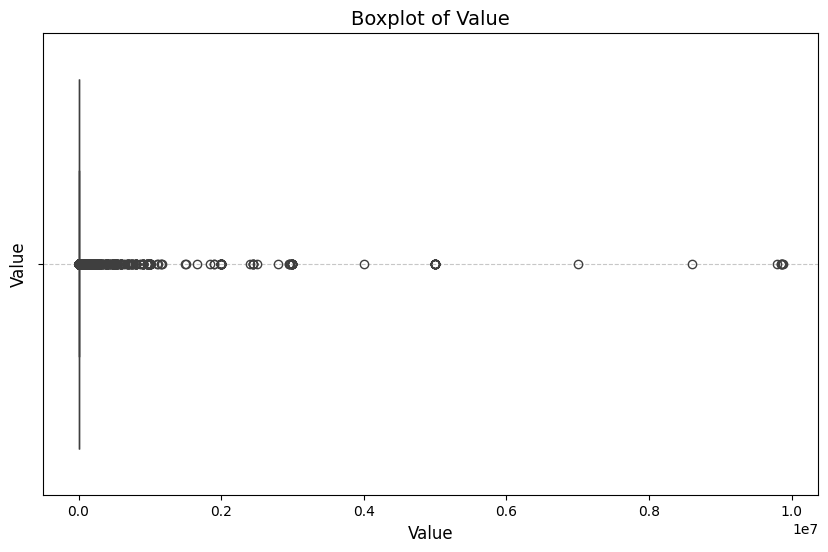

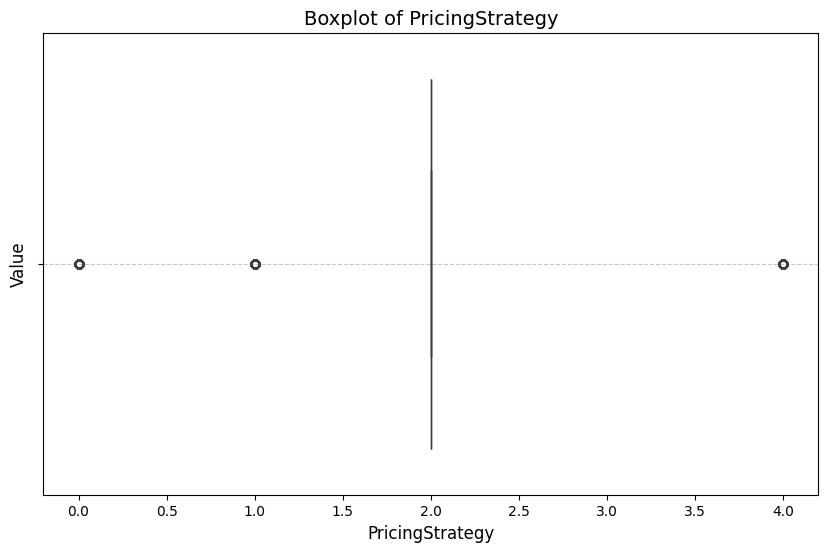

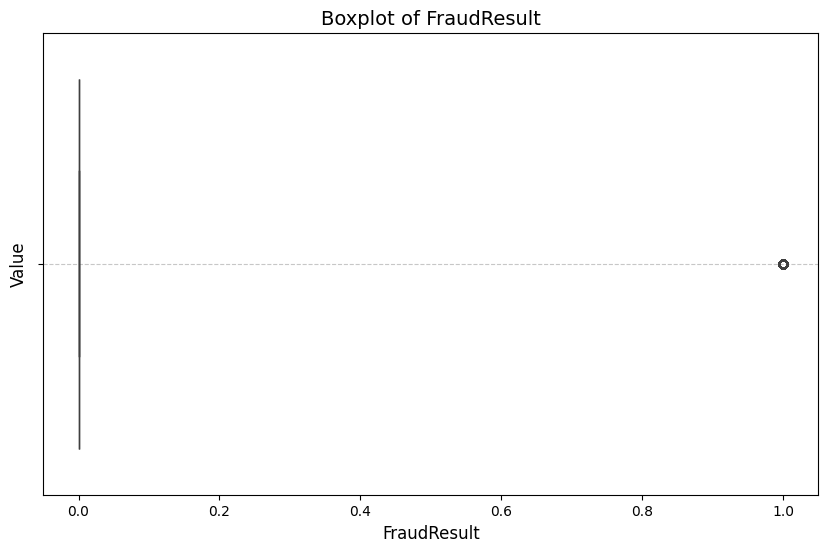

EDA completed successfully!


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def perform_eda(df):
    """
    Perform Exploratory Data Analysis (EDA) on the given DataFrame.

    Parameters:
    df (pd.DataFrame): Input DataFrame

    Returns:
    None: Displays plots and prints summaries.
    """
    # Overview of the data
    print("\n--- Dataset Overview ---")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print("\n--- Data Types ---")
    print(df.dtypes)

    # Summary statistics
    print("\n--- Summary Statistics ---")
    print(df.describe(include='all'))

    # Missing values
    print("\n--- Missing Values ---")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])

    # Distribution of numerical features
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    print("\n--- Distribution of Numerical Features ---")
    for feature in numerical_features:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[feature], kde=True, bins=30)
        plt.title(f'Distribution of {feature}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

    # Distribution of categorical features
    categorical_features = df.select_dtypes(include=['object', 'category']).columns
    print("\n--- Distribution of Categorical Features ---")
    for feature in categorical_features:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
        plt.title(f'Distribution of {feature}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

    # Correlation analysis
    print("\n--- Correlation Analysis ---")
    if len(numerical_features) > 1:
        corr_matrix = df[numerical_features].corr()
        plt.figure(figsize=(12, 10))
        sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
        plt.title('Correlation Matrix of Numerical Features', fontsize=14)
        plt.xlabel('Features', fontsize=12)
        plt.ylabel('Features', fontsize=12)
        plt.show()
    else:
        print("Not enough numerical features for correlation analysis.")

    # Outlier detection using box plots
    print("\n--- Outlier Detection ---")
    for feature in numerical_features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x=feature)
        plt.title(f'Boxplot of {feature}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Value', fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

    print("EDA completed successfully!")

perform_eda(df)

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
import xverse
from xverse.transformer import WOE

def feature_engineering(df):
    """
    Perform feature engineering on the given DataFrame.

    Parameters:
    df (pd.DataFrame): Input DataFrame

    Returns:
    pd.DataFrame: DataFrame with engineered features.
    """

    # Create Aggregate Features
    print("\n--- Creating Aggregate Features ---")
    df['TotalTransactionAmount'] = df.groupby('CustomerId')['Amount'].transform('sum')
    df['AvgTransactionAmount'] = df.groupby('CustomerId')['Amount'].transform('mean')
    df['TransactionCount'] = df.groupby('CustomerId')['Amount'].transform('count')
    df['StdTransactionAmount'] = df.groupby('CustomerId')['Amount'].transform('std')

    # Extract Date-Based Features
    print("\n--- Extracting Date-Based Features ---")
    df['TransactionHour'] = pd.to_datetime(df['TransactionStartTime']).dt.hour
    df['TransactionDay'] = pd.to_datetime(df['TransactionStartTime']).dt.day
    df['TransactionMonth'] = pd.to_datetime(df['TransactionStartTime']).dt.month
    df['TransactionYear'] = pd.to_datetime(df['TransactionStartTime']).dt.year

    # Encode Categorical Variables
    print("\n--- Encoding Categorical Variables ---")
    # One-Hot Encoding
    one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # Updated for scikit-learn >= 1.2.0
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    one_hot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(df[categorical_cols]),
                                   columns=one_hot_encoder.get_feature_names_out(categorical_cols))
    df = pd.concat([df, one_hot_encoded], axis=1)

    # Label Encoding (Example for one column, e.g., 'CurrencyCode')
    label_encoder = LabelEncoder()
    if 'CurrencyCode' in df.columns:
        df['CurrencyCode_Encoded'] = label_encoder.fit_transform(df['CurrencyCode'])

    # Handle Missing Values
    print("\n--- Handling Missing Values ---")
    imputer = SimpleImputer(strategy='mean')  # Example with mean, change strategy as needed
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

    # Normalize/Standardize Numerical Features
    print("\n--- Normalizing/Standardizing Numerical Features ---")
    scaler = MinMaxScaler()  # Use StandardScaler() for standardization
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    # Feature Engineering with Weight of Evidence (WOE)
    print("\n--- Feature Engineering with WOE ---")
    woe_transformer = WOE()
    if 'FraudResult' in df.columns:
        woe_data = woe_transformer.fit_transform(df, df['FraudResult'])
        df = pd.concat([df, woe_data], axis=1)

    print("Feature Engineering completed successfully!")
    return df


In [2]:
import sys
import os
sys.path.append(os.path.abspath('../src'))
from EDA import perform_eda

# perform_eda(df)

ImportError: cannot import name 'perform_eda' from 'EDA' (c:\Users\User\Desktop\Bank-Credit-Scoring-Model\src\EDA.py)